The idea of this notebook is to reproduce the images shown in Lázaro Alonso's [Clifford Attractor example](https://nbviewer.jupyter.org/github/lazarusA/CodeSnippets/blob/master/CodeSnippetsJulia/CliffordJuliaVersion.ipynb) using low-level GR functions.

In [1]:
function clifford(x::Float64, y::Float64, a::Float64, b::Float64, c::Float64, d::Float64)
    sin(a * y) + c * cos(a * x), sin(b * x) + d * cos(b * y)
end

clifford (generic function with 1 method)

In [2]:
function trajectory(fn, x0::Float64, y0::Float64, a::Float64, b::Float64, c::Float64, d::Float64, 
        dθ::Float64,  n::Int64)
    x, y, θ = zeros(n), zeros(n), 0.01
    x[1], y[1] = x0, y0
    for i = 1:n
        xd, yd = fn(x[i], y[i], a, b, c, d)
        @inbounds x[i+1], y[i+1] = xd*cos(θ), yd*cos(θ)
        θ += dθ
    end
    x, y
end

trajectory (generic function with 1 method)

In [3]:
n = 5000000
x, y = trajectory(clifford, 0.0, 0.0, -1.3, -1.3, -1.8, -1.9, 0.007, n);

  0.698064 seconds (68.93 k allocations: 3.472 MiB, 7.15% gc time)


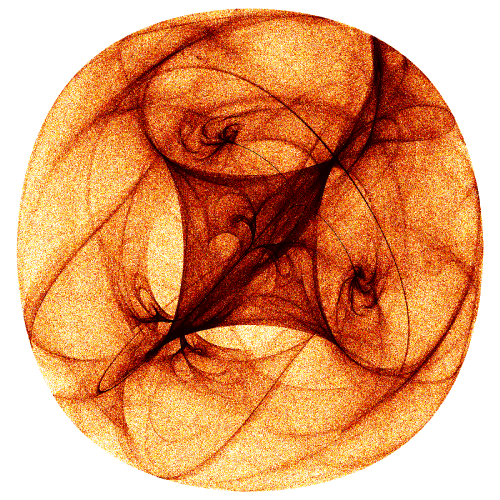

In [4]:
using GR
setcolormap(-19)
setviewport(0, 1, 0, 1)
setwindow(-3, 3, -3, 3)
@time shadepoints(x, y, how=5)
GR.show()